# STEM simulations with the PRISM algorithm

In [1]:
%load_ext autoreload
%autoreload 2
from ase.build import mx2
from ase.io import read
import numpy as np

from tensorwaves.waves import PrismWaves
from tensorwaves.potentials import Potential
from tensorwaves.detect import RingDetector

## Quick Simulation

In [2]:
atoms = read('../data/mos2.traj')

cell = np.diag(atoms.get_cell())

print('Simulation super cell:', cell)

Simulation super cell: [12.72       11.01584314  5.19      ]


In [8]:
waves = PrismWaves(energy=80e3, cutoff=.02, interpolation=2, sampling=.05)

S = waves.multislice(atoms)

detector = RingDetector(inner=.05, outer=.2)

scan = S.gridscan(start=(0,0), end=(cell[0] / 2, cell[1] / 2), sampling=.2, detectors=detector)

Scanning [||||||||||||||||||||||||||||||||||||||||||||||||||] 837/837 


In [9]:
S.aberrations.set_parameters({'C10':10})

In [7]:
S.aberrations.defocus

10.0

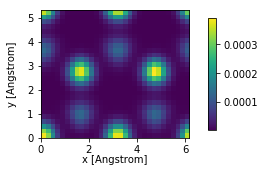

In [10]:
image = scan.image()

image.show()

## Step-by-step Simulation

### Set up unit cell

In [11]:
atoms = mx2(formula='MoS2', kind='2H', a=3.18, thickness=3.19)
atoms *= (2,2,1)
atoms.cell[1,0] = 0
atoms.wrap()
atoms *= (2,2,1)
atoms.center(vacuum=1, axis=2)

cell = np.diag(atoms.get_cell())

from ase.io import write

write('MoS2.traj',atoms)
print(cell)

[12.72       11.01584314  5.19      ]


### Create Potential

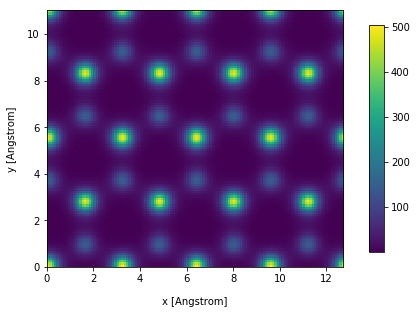

In [16]:
potential = Potential(atoms=atoms, parametrization='kirkland', num_slices=10, sampling=.1)

potential.current_slice = 3

potential.show(fig_scale=2)

### Create Scattering Matrix

In [17]:
waves = PrismWaves(energy=80e3, cutoff=.02, interpolation=1, gpts=potential.gpts, extent=potential.extent)
S = waves.get_scattering_matrix()

S = S.multislice(potential)

Multislice [||||||||||||||||||||||||||||||||||||||||||||||||||] 10/10 


### Set Aberrations & Examine Probe

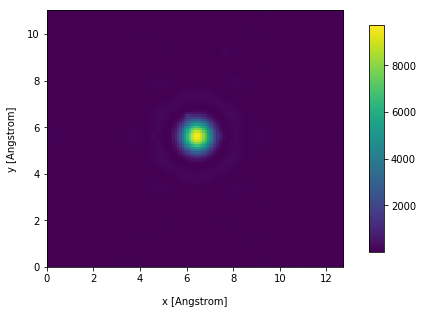

In [20]:
S.position = (2,0)
S.aberrations.C10 = 10
S.aperture.radius = .02

probe = S.get_probe()
probe.show(fig_scale=2, space='direct')

### Create Detector

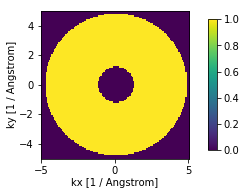

In [23]:
detector = RingDetector(inner=.05, outer=.2, gpts=probe.gpts, extent=probe.extent, energy=probe.energy)

detector.build().show(space='fourier')

### Perform Grid Scan 

In [24]:
start = (0,0)
end = (cell[0]/2, cell[1]/2)

scan = S.gridscan(start=(0,0), end=end, sampling=.2, detectors=detector)

Scanning [||||||||||||||||||||||||||||||||||||||||||||||||||] 837/837 


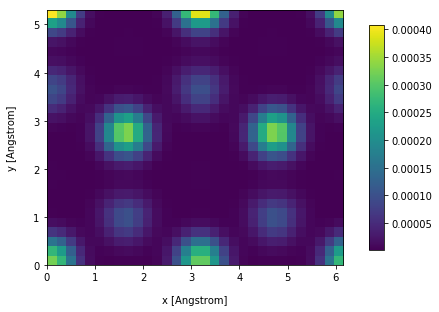

In [25]:
image = scan.image()
image.show(fig_scale=2)

In [26]:
image.numpy()

array([[[0.0179813 , 0.01645001, 0.01256054, 0.00785698, 0.00389093,
         0.00154065, 0.00080137, 0.00105142, 0.00153382, 0.00174454,
         0.00156896, 0.00120611, 0.00101577, 0.00137944, 0.00257103,
         0.00460293, 0.00708524, 0.00922922, 0.01011855, 0.00921192,
         0.00682102, 0.00420878, 0.00310723, 0.00481286, 0.0093525 ,
         0.01526322, 0.0202061 ],
        [0.01643294, 0.01497754, 0.01136648, 0.00705071, 0.00346122,
         0.00137698, 0.00075123, 0.00098599, 0.00139248, 0.00154004,
         0.00135481, 0.00102609, 0.00086326, 0.00118865, 0.00224515,
         0.0040654 , 0.00632773, 0.00833052, 0.00922091, 0.00846151,
         0.00629697, 0.00387376, 0.00280581, 0.00432443, 0.00848027,
         0.01392212, 0.01846988],
        [0.01245217, 0.01123759, 0.00840591, 0.00514594, 0.00255586,
         0.00114772, 0.00077272, 0.00091583, 0.00109247, 0.00108351,
         0.00092606, 0.00076995, 0.00076545, 0.00104985, 0.0017637 ,
         0.00298831, 0.0045944 , 0.